In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


# Visualizing the processed data
In this notebook, we aim to visualize our core components of the project.
## 1. Timeline visualization
We'll start with creating a timeline for each name, and display a certain amount of movies (for example the top 10) that came out throughout the years.

In [2]:
folder_processed_data_path = './data/processed_data/'

movie_df = pd.read_csv(os.path.join(folder_processed_data_path, 'movie_df.csv'))
movie_df.set_index(['wiki_ID'], inplace=True)

name_by_movie_df = pd.read_csv(os.path.join(folder_processed_data_path, 'name_by_movie_ordered_df.csv'))
name_by_movie_df.set_index(['wiki_ID', 'char_words', 'gender'], inplace=True)

baby_name_df = pd.read_csv(os.path.join(folder_processed_data_path, 'baby_name_df.csv'))
baby_name_df.set_index(['name', 'year'], inplace=True)

**Visualisation for a specific name:** Let's choose a name and visualize the variation of the baby names throughout the years. We'll pick `Mia`, because it's a cool name.

In [3]:
# Set a name
chosen_name = "Mia"

# Filter the name_by_movie_df by the chosen name
filt_name_by_movie_df = name_by_movie_df.query("char_words == @chosen_name").copy(deep=True)
filt_name_by_movie_df.reset_index(inplace=True)

display(filt_name_by_movie_df.sort_values(by="wiki_ID").head())
print(f"There are {len(filt_name_by_movie_df)} movies with a character named {chosen_name}.")

,wiki_ID,char_words,gender,order
0,54173,Mia,F,2.0
1,99984,Mia,F,25.0
2,176545,Mia,F,4.0
3,248222,Mia,F,3.0
4,370064,Mia,F,12.0


There are 47 movies with a character named Mia.


In [4]:
# Keep only wiki_ID column
filt_name_by_movie_df = filt_name_by_movie_df[['wiki_ID']].copy(deep=True)

# Merge the movie_df with the filt_name_by_movie_df
filt_movie_df = pd.merge(movie_df, filt_name_by_movie_df, on='wiki_ID', how='inner').copy(deep=True)
display(filt_movie_df.sort_values(by="wiki_ID").head())

,wiki_ID,mov_name,year,month,revenue,numVotes,averageRating
35,54173,Pulp Fiction,1994,5.0,213928762.0,2158972,8.9
22,99984,Una Aventura Llamada Menudo,1982,NaN,NaN,34,6.2
2,176545,The Seventh Seal,1957,2.0,NaN,194183,8.1
13,248222,The Fast and the Furious,2001,6.0,207283925.0,409735,6.8
8,370064,Love Actually,2003,9.0,246942017.0,508246,7.6


There are too many movies. Let's keep only the 10 most famous ones for now. We base it on the `numVotes` column, representing the number of IMDB votes:

In [5]:
# We set the number of top movies for this visualization
top_movie_count = 10

# Sort by top rated movies
sorted_filt_movie_df = filt_movie_df.sort_values(by='numVotes', ascending=False).copy(deep=True)

# Keep only the top 10 movies
filt_movie_df = sorted_filt_movie_df.head(top_movie_count).copy(deep=True)
display(filt_movie_df)

# Get the release dates
release_serie = filt_movie_df['year']

,wiki_ID,mov_name,year,month,revenue,numVotes,averageRating
35,54173,Pulp Fiction,1994,5.0,213928762.0,2158972,8.9
8,370064,Love Actually,2003,9.0,246942017.0,508246,7.6
17,31567587,The Fast and the Furious 6,2013,5.0,NaN,410579,7.0
13,248222,The Fast and the Furious,2001,6.0,207283925.0,409735,6.8
33,28085067,Fast Five,2011,4.0,626100000.0,400211,7.3
4,15656621,Fast & Furious,2009,3.0,363164265.0,304616,6.5
2,176545,The Seventh Seal,1957,2.0,NaN,194183,8.1
10,34250968,The Evil Dead,2013,4.0,NaN,193645,6.5
31,564986,The Princess Diaries,2003,7.0,168335153.0,158588,6.4
19,8896753,Case 39,2009,8.0,13000000.0,91889,6.2


We now plot the percentage of babies having the chosen name `Mia` for each year:

There are 83 years with a character named Mia. 
The earliest year is 1933 and the latest is 2022.


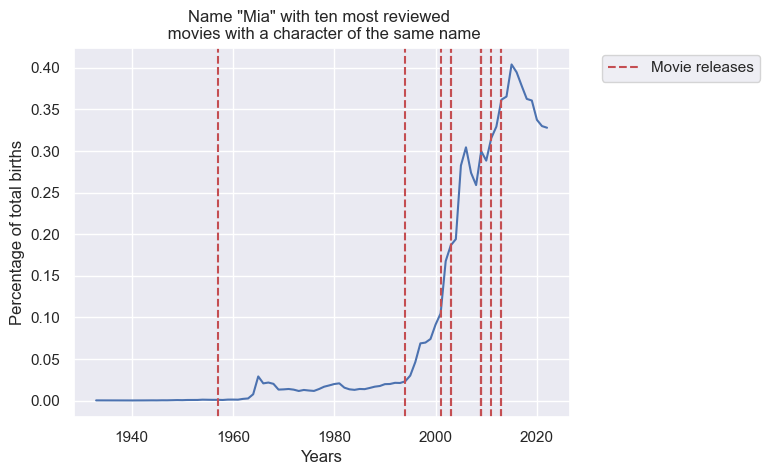

In [6]:
# Grab percentage data
percentage_df = baby_name_df.loc[chosen_name]['percentage'].to_frame().reset_index()
percentage_df.sort_values(by=['year'], ascending=True, inplace=True)
print(f"There are {len(percentage_df)} years with a character named {chosen_name}. \nThe earliest year is {percentage_df['year'].min()} and the latest is {percentage_df['year'].max()}.")

x_values = percentage_df['year'].values
y_values = percentage_df['percentage'].values

# Plotting
plt.plot(x_values, y_values)
plt.xlabel('Years')
plt.ylabel('Percentage of total births')
plt.title(f'Name "{chosen_name}" with ten most reviewed \n movies with a character of the same name')

# Draw vertical lines for each movie release
vertical_lines_series = release_serie.values
for x_value in vertical_lines_series:
    plt.axvline(x=x_value, color='r', linestyle='--')

# Labeling
plt.axvline(x=x_value, color='r', linestyle='--', label='Movie releases')
plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1))
plt.show()

We note that there are not 10 marks on the graphs, that's because some movies had the same release year. We won't be able to distinguish them in our analysis and they will be considered as having the same impact (which would be in reality their "cumulated" impact).

## 2. Parallel questions 
### a. Distribution of months in movies
Looking at studies showing that baby conception rates are at the highest in fall or winter season leading to higher birth in the summer, will movies released in summer show the highest correlation with newborn naming?

First, we look at which data is missing, and how it is spread across the dataset.

Proportion of movies with recorded release month: 58.115%


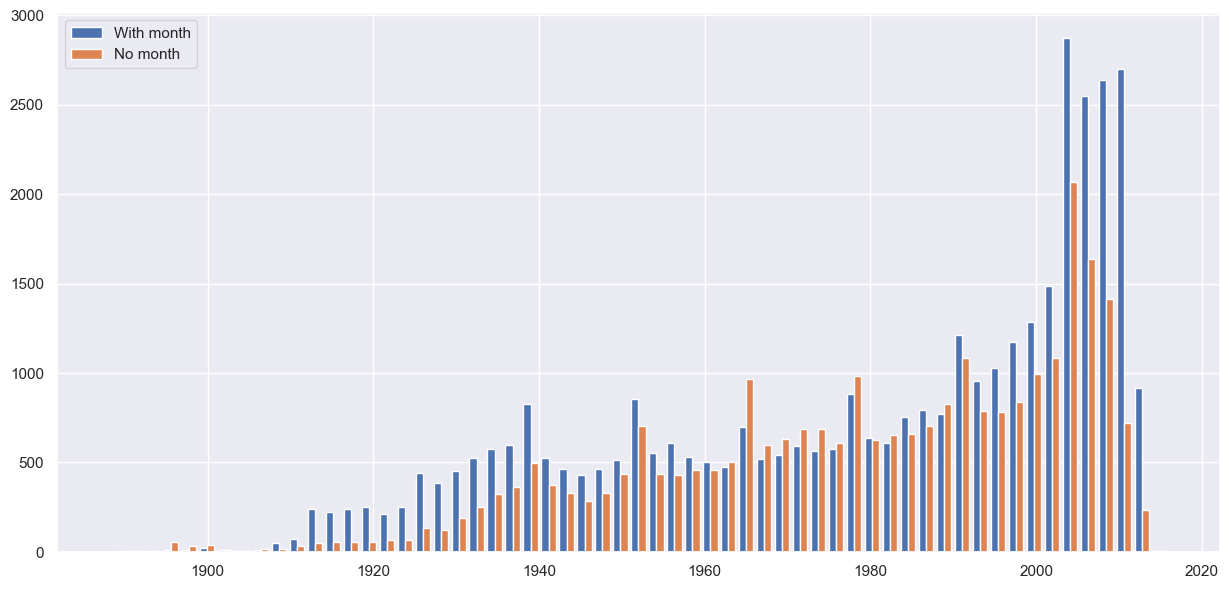

In [7]:
plt.close('all')
# How many movies have months?
print(f"Proportion of movies with recorded release month: {movie_df.month.notna().mean()*100:.3f}%")
# Are there years where there is a significant proportion of missing data?
plt.figure(figsize=(15, 7))
plt.hist([movie_df.year[movie_df.month.notna()], movie_df.year[movie_df.month.isna()]], label=['With month', 'No month'], bins='auto', stacked=False)
plt.legend(loc=2)
plt.show()

We would also like to know if there are significant differences in movie releases between each month:

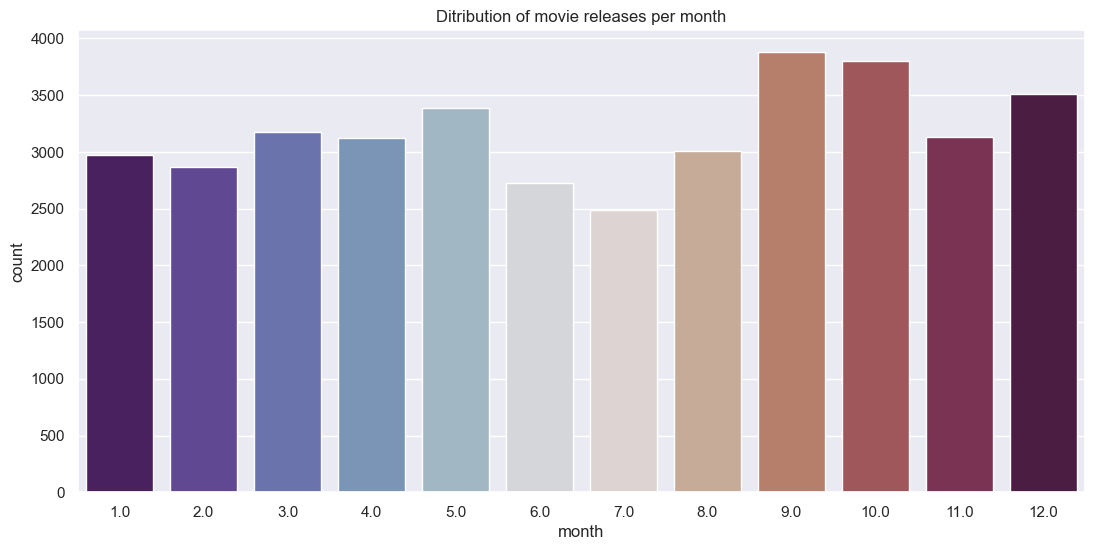

In [8]:
plt.close('all')
# Plot the distribution of months for movies
plt.figure(figsize=(13, 6))
sns.set_palette('rocket')
sns.countplot(x='month', data=movie_df, palette="twilight_shifted")
# plt.bar(['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'], movie_df.groupby('month').count().mov_name)
plt.title('Ditribution of movie releases per month')
plt.show()

### b. Movie genres
Does the genre of a movie play a role in the influence of character names on baby naming trends?

In [9]:
# Import the genres
movie_genres_df = pd.read_csv(os.path.join(folder_processed_data_path, 'movie_genres_df.csv'))

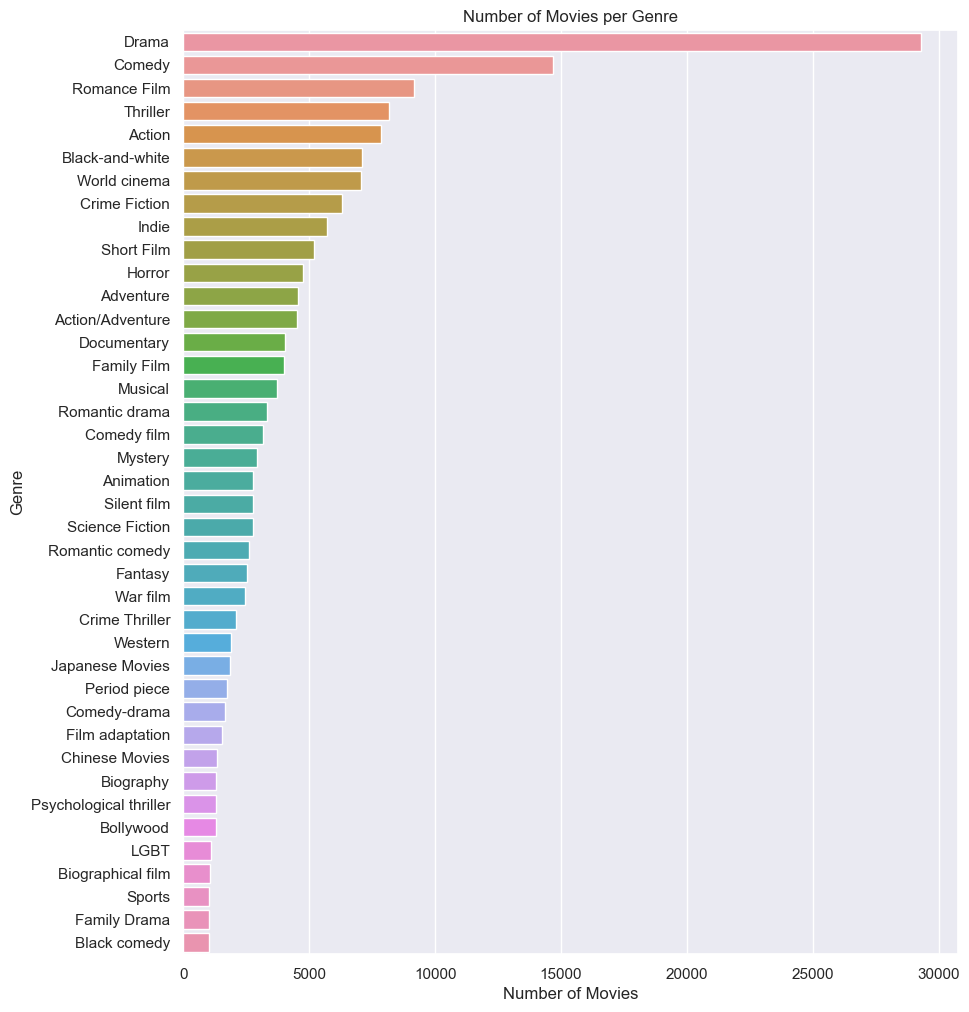

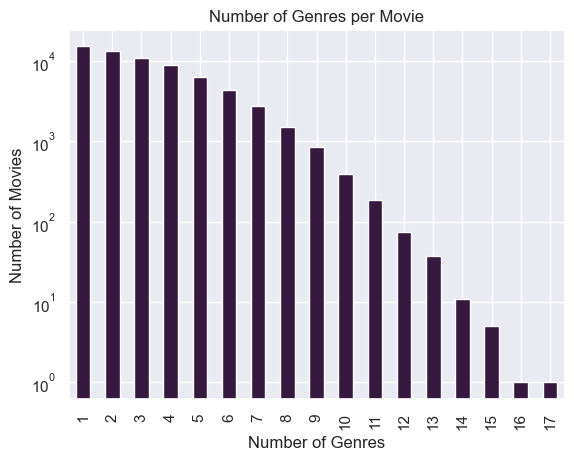

In [10]:
# Plot the number of movies per genre
plt.figure(figsize=(10, 12))
sns.countplot(y='genre', data=movie_genres_df, order=movie_genres_df['genre'].value_counts().index[:40]) # only take top 40 genres

plt.title('Number of Movies per Genre')
plt.xlabel('Number of Movies')
plt.ylabel('Genre')
plt.show()

# Count the number of genres in movies
genre_counts = movie_genres_df.groupby('wiki_ID')['genre'].count()
genre_count_frequency = genre_counts.value_counts().sort_index()

genre_count_frequency.plot(kind='bar')
plt.title('Number of Genres per Movie')
plt.xlabel('Number of Genres')
plt.ylabel('Number of Movies')
plt.yscale('log')
plt.show()

In [11]:
top_5_genres = movie_genres_df['genre'].value_counts().index[:5].values
print(top_5_genres)

['Drama' 'Comedy' 'Romance Film' 'Thriller' 'Action']


We can see that the most popular genres are these one above.

### c. Movie popularity
We compute the movie's popularity based on their number of votes on IMDB, which we now have.

In [12]:
plt.close('all')

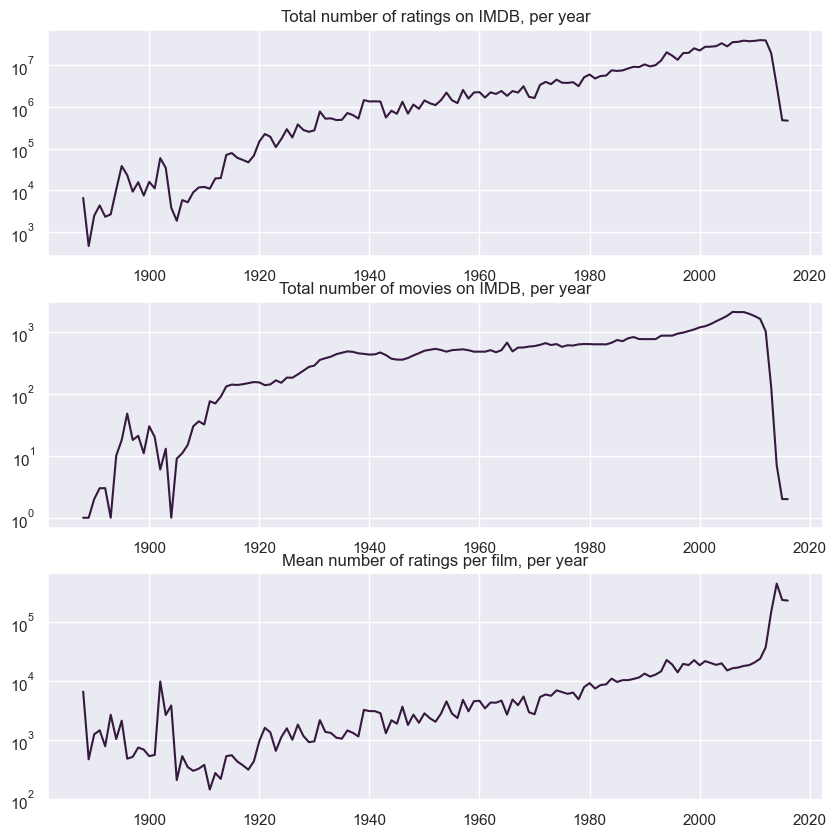

In [13]:
plt.close('all')

plt.figure(figsize=(10, 10))
plt.subplot(311)
plt.plot(movie_df.groupby('year').numVotes.sum())
plt.title("Total number of ratings on IMDB, per year")
plt.yscale('log')
#
plt.subplot(312)
plt.plot(movie_df.groupby('year').count().mov_name)
plt.title("Total number of movies on IMDB, per year")
plt.yscale('log')
#
plt.subplot(313)
plt.plot(movie_df.groupby('year').numVotes.mean())
plt.title("Mean number of ratings per film, per year")
plt.yscale('log')
plt.show()

### d. Importance of characters in movies
Importance is based on the TMDB dataset, represented by orders. The lower the number, the more important the character.

In [14]:
name_by_movie_df.groupby('wiki_ID').count().head()

,order
wiki_ID,
3217,11
3746,15
3837,18
3947,16
4227,2


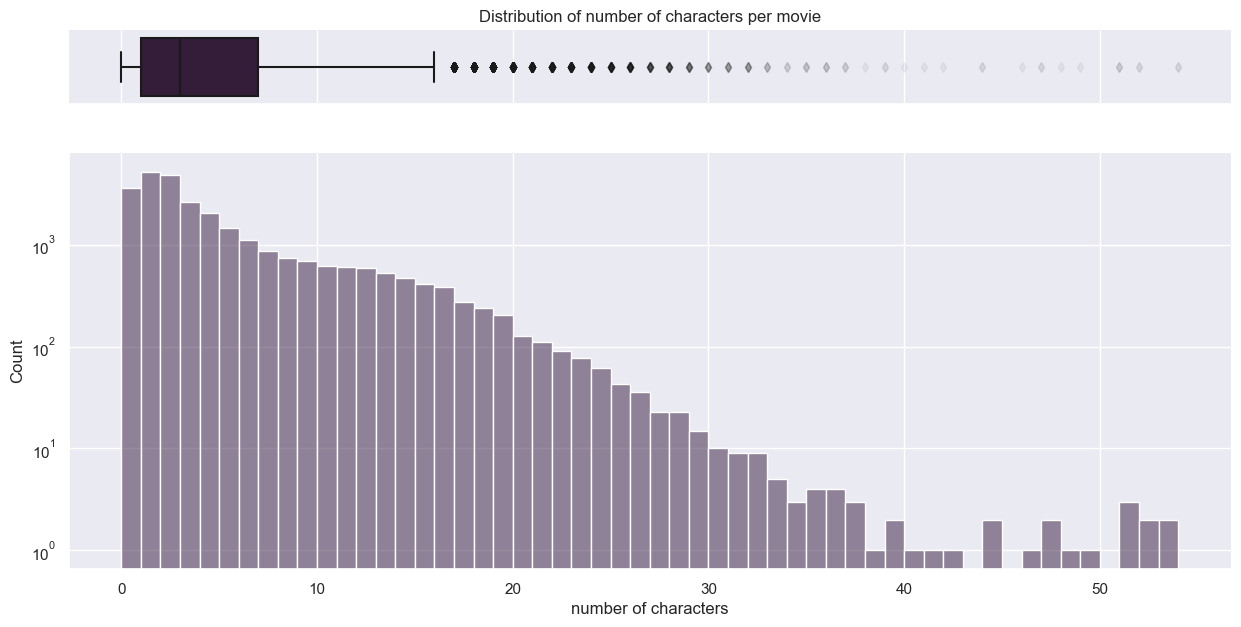

In [15]:
plt.close('all')
# Plot a histogram and a boxplot of number of characters in movies
fig, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)}, figsize=(15, 7))

n_chars = name_by_movie_df.groupby('wiki_ID').count()

sns.boxplot(x=n_chars.values, ax=ax_box, flierprops={'alpha':0.05})
sns.histplot(n_chars, bins=np.max(n_chars)-np.min(n_chars), ax=ax_hist)

ax_box.set(yticks=[])
sns.despine(ax=ax_hist)
sns.despine(ax=ax_box, left=True)

ax_hist.get_legend().remove()
ax_hist.set_yscale('log')
ax_hist.set_xlabel('number of characters')
ax_box.set_title('Distribution of number of characters per movie')
plt.show()

In [16]:
# How many movies have ordered characters? (all characters in the movie have NaN values for orders)
print(f"Proportion of movies with ordered characters: {name_by_movie_df.order.notna().mean()*100:.3f}%")

Proportion of movies with ordered characters: 80.032%


### e. Genders of movie characters
We can check how the character genders are distributed in the movies. It's important to remember that this doesn't show the number of male or female characters, but rather the number of names derived from the character names. For example a female character that has 3 names will contribute with 3 entries in our dataset.

,genders_count
gender,
F,51338
M,83318
NaN,3724


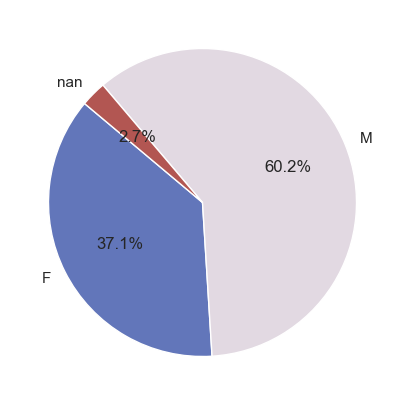

In [17]:
# Count the number of genders in all movies, keep nan values
names_by_gender = name_by_movie_df.groupby('gender', dropna=False).count()
names_by_gender = names_by_gender.rename(columns={'order': 'genders_count'})
display(names_by_gender)

# Create pie chart of the counts
plt.figure(figsize=(5, 5))
plt.pie(names_by_gender.genders_count, labels=names_by_gender.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('twilight_shifted', 3))

plt.show()

Let's check the ratio of M/F/NaN for some movie genres, for exmple the top 10:

In [20]:
# Grab top 10 genres and order them by count
top_genres = movie_genres_df['genre'].value_counts().nlargest(10)
display(top_genres)

# Merge on the genre column to keep only the top 10 genre movies
top_genre_movies_ids_df = pd.merge(movie_genres_df, top_genres, on='genre', how='inner').drop(columns=['count'])
display(top_genre_movies_ids_df.head())

# Merge to keep the character names with the genres only
names_per_genre = pd.merge(top_genre_movies_ids_df, name_by_movie_df.reset_index(), on='wiki_ID', how='inner')
display(names_per_genre.head())

# Group by genre, count different genders
gender_counts_per_genre = names_per_genre.groupby(['genre', 'gender'], dropna=False).count()
gender_counts_per_genre = gender_counts_per_genre.rename(columns={'wiki_ID': 'count'}).drop(columns=['char_words', 'order'])
display(gender_counts_per_genre.head(9))

genre
Drama              29318
Comedy             14665
Romance Film        9169
Thriller            8148
Action              7859
Black-and-white     7078
World cinema        7073
Crime Fiction       6301
Indie               5695
Short Film          5204
Name: count, dtype: int64

,wiki_ID,genre
0,330,Drama
1,3333,Drama
2,3746,Drama
3,4227,Drama
4,4560,Drama


,wiki_ID,genre,char_words,gender,order
0,3746,Drama,Deckard,M,0.0
1,3746,Drama,Eldon,M,8.0
2,3746,Drama,Lewis,M,12.0
3,3746,Drama,Bear,M,11.0
4,3746,Drama,Leon,M,7.0


count
genre           gender       
Action          F        8673
                M       22138
                NaN       764
Black-and-white F        3010
                M        5331
                NaN       361
Comedy          F       20862
                M       31937
                NaN      1590

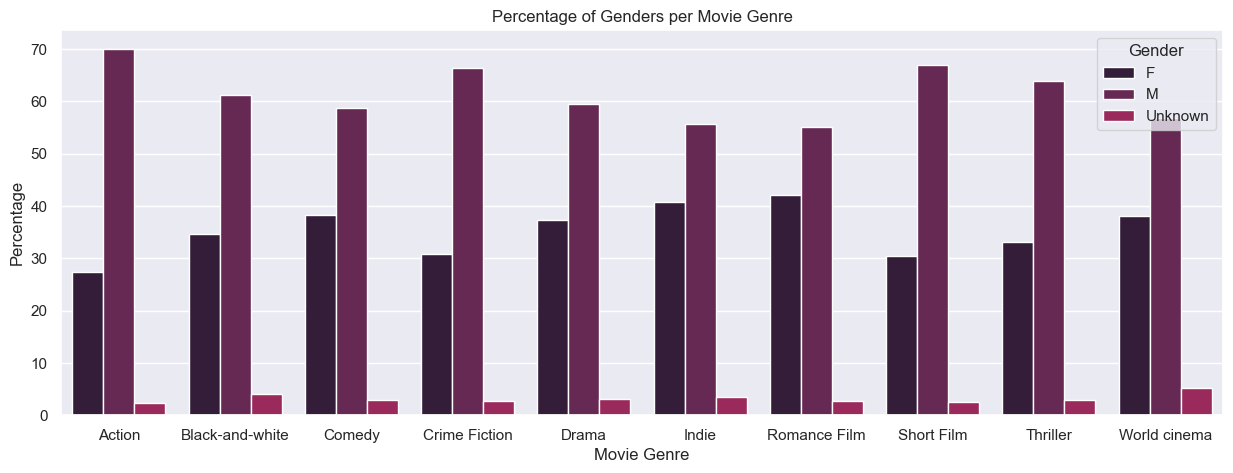

In [21]:
# Change the NaN values to Unknown
df = gender_counts_per_genre.reset_index().copy(deep=True)
df['gender'] = df['gender'].fillna('Unknown')

# Calculate the total count per genre
total_per_genre = df.groupby('genre')['count'].sum()

# Calculate the percentage
df['percentage'] = df.apply(lambda row: (row['count'] / total_per_genre[row['genre']]) * 100, axis=1)

# Plotting
plt.figure(figsize=(15, 5))
sns.barplot(x='genre', y='percentage', hue='gender', data=df)

plt.xlabel('Movie Genre')
plt.ylabel('Percentage')
plt.title('Percentage of Genders per Movie Genre')
plt.legend(title='Gender')
plt.show()